In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
sns.set_context("poster")


In [3]:
path = "results/linear_multi"
# path = "results/nonlinear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_1.csv', 'results/linear_multi\\linear_dgp_10.csv', 'results/linear_multi\\linear_dgp_11.csv', 'results/linear_multi\\linear_dgp_12.csv', 'results/linear_multi\\linear_dgp_13.csv', 'results/linear_multi\\linear_dgp_14.csv', 'results/linear_multi\\linear_dgp_15.csv', 'results/linear_multi\\linear_dgp_16.csv', 'results/linear_multi\\linear_dgp_17.csv', 'results/linear_multi\\linear_dgp_18.csv', 'results/linear_multi\\linear_dgp_19.csv', 'results/linear_multi\\linear_dgp_2.csv', 'results/linear_multi\\linear_dgp_20.csv', 'results/linear_multi\\linear_dgp_21.csv', 'results/linear_multi\\linear_dgp_22.csv', 'results/linear_multi\\linear_dgp_23.csv', 'results/linear_multi\\linear_dgp_24.csv', 'results/linear_multi\\linear_dgp_25.csv', 'results/linear_multi\\linear_dgp_26.csv', 'results/linear_multi\\linear_dgp_27.csv', 'results/linear_multi\\linear_dgp_28.csv', 'results/linear_multi\\linear_dgp_29.csv', 'results/linear_multi\\linear_dgp_3.csv', 'results/line

In [4]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [8]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE    MAE   MAPE   q025  \
0      1.0  1.214   1.214  1.186  0.028  0.031  0.042  0.034  0.029  1.153   
1      1.0  1.209   1.209  1.186  0.023  0.036  0.042  0.034  0.029  1.136   
2      1.0  4.132   4.131  4.037  0.095  0.108  0.143  0.117  0.029  3.922   
3      1.0  4.025   4.026  4.037 -0.012  0.136  0.137  0.109  0.027  3.751   
4      1.0  0.865   0.865  1.186 -0.321  0.072  0.329  0.321  0.270  0.724   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
155  306.0  2.523   2.524  3.780 -1.257  0.244  1.280  1.257  0.332  2.036   
156  306.0  1.086   1.086  1.136 -0.050  0.041  0.065  0.055  0.048  1.003   
157  306.0  1.055   1.049  1.136 -0.081  0.072  0.109  0.094  0.082  0.926   
158  306.0  3.640   3.640  3.780 -0.140  0.141  0.199  0.164  0.043  3.357   
159  306.0  3.364   3.366  3.780 -0.416  0.253  0.487  0.426  0.113  2.855   

      q975  covering           method estimand  TRUE   model   

In [9]:
combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

In [10]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [11]:
def coverage_perc(x):
    return np.mean(x)*100

df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'MAE' : ['mean'],
                                         'MAPE' : ['mean'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc]}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,true,RMSE,MAE,MAPE,q025,q975,ci_length,covering
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,coverage_perc
0,dynamic,GP,1S,0.994603,0.995773,0.068169,-0.082641,1.080304,0.119763,0.103949,0.095871,0.855837,1.126719,0.270881,74.576271
1,dynamic,GP,3S,0.771922,0.776000,0.079695,-0.305322,1.080304,0.316051,0.305346,0.282725,0.604075,0.917407,0.313332,0.677966
2,dynamic,GP,Obs.,0.597112,0.596980,0.069861,-0.480132,1.080304,0.485861,0.480359,0.443678,0.460339,0.734153,0.273814,2.033898
3,dynamic,GP,Oracle,1.033529,1.034261,0.044278,-0.043715,1.080304,0.069586,0.059024,0.054807,0.943532,1.119122,0.175590,85.084746
4,dynamic,Linear,1S,1.069858,1.069878,0.037102,-0.007386,1.080304,0.055478,0.047180,0.043519,0.996654,1.142695,0.146041,90.508475
5,dynamic,Linear,3S,0.955383,0.955542,0.048949,-0.121861,1.080304,0.132837,0.123627,0.113583,0.861095,1.051671,0.190576,27.457627
6,dynamic,Linear,Obs.,0.781986,0.782047,0.057586,-0.295258,1.080304,0.302142,0.295803,0.270953,0.668366,0.895014,0.226647,4.745763
7,dynamic,Linear,Oracle,1.077203,1.077139,0.031047,-0.000041,1.080304,0.041000,0.033946,0.031451,1.015834,1.138024,0.122190,94.915254
8,stoch,GP,1S,3.418604,3.425027,0.269105,-0.458837,3.877920,0.559034,0.499471,0.128790,2.873634,3.929709,1.056075,55.932203


Text(0, 0.5, '')

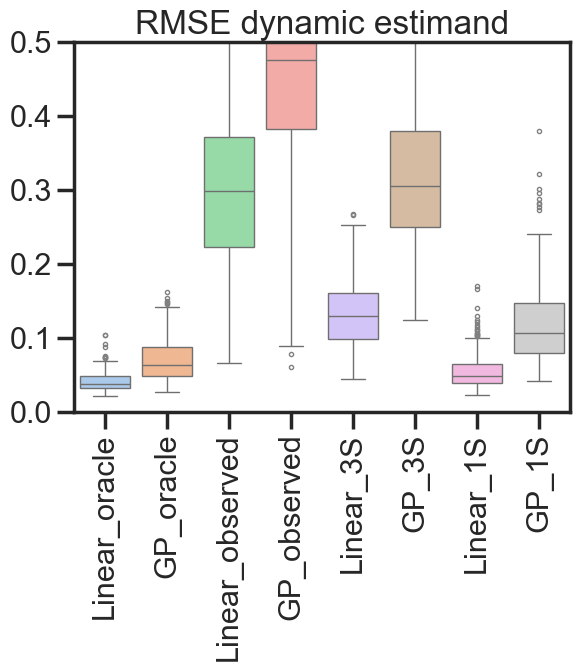

In [12]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

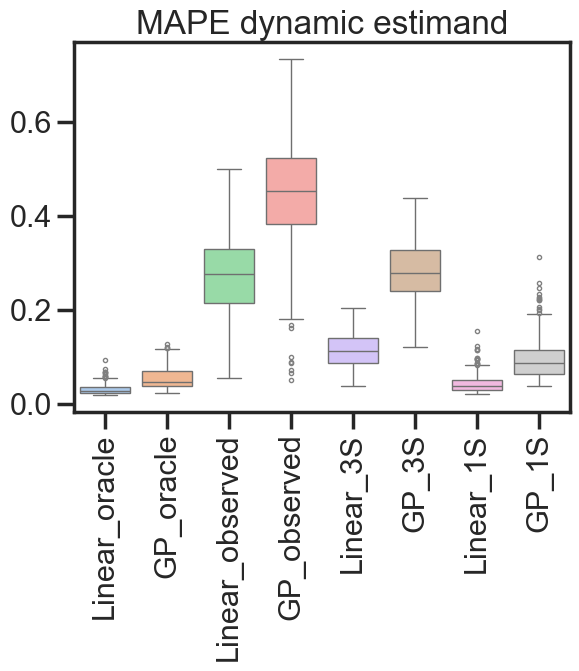

In [13]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

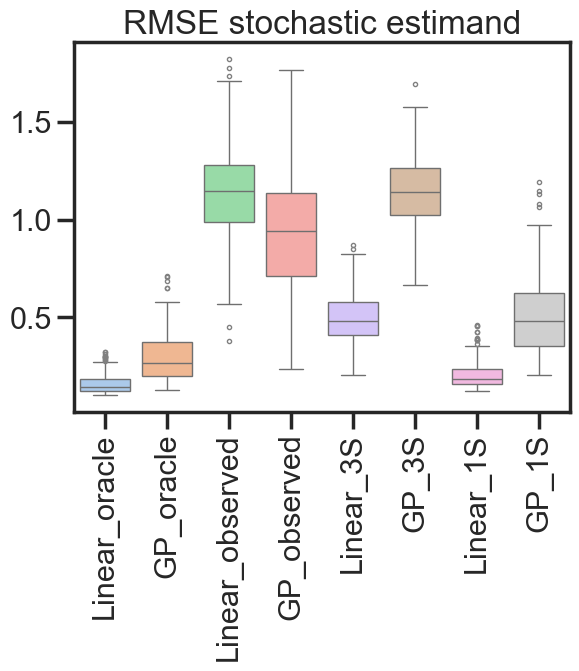

In [14]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

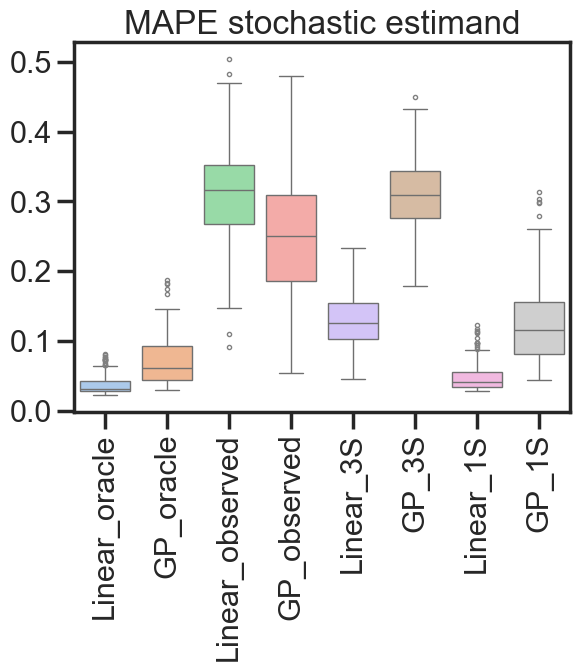

In [15]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

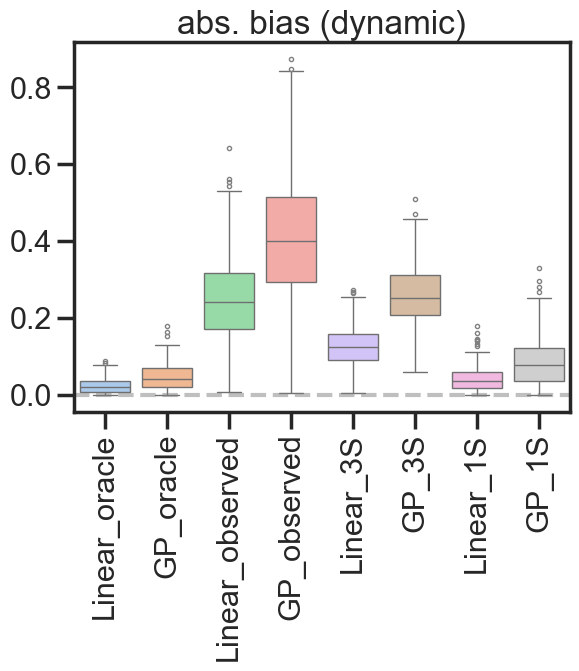

In [17]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

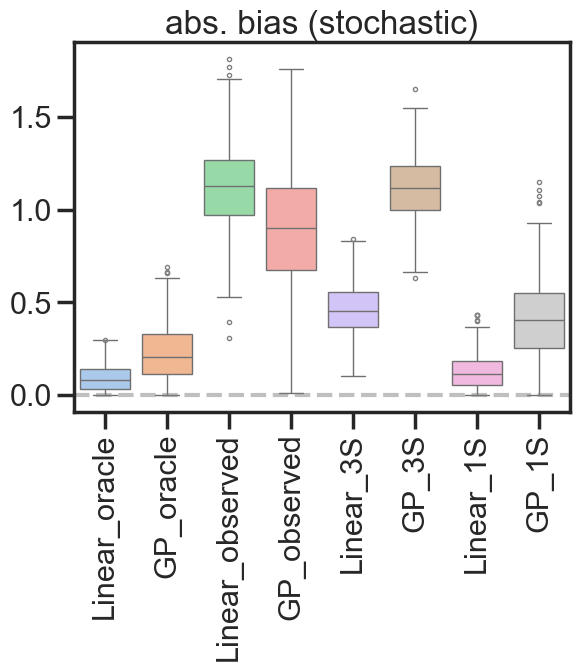

In [18]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

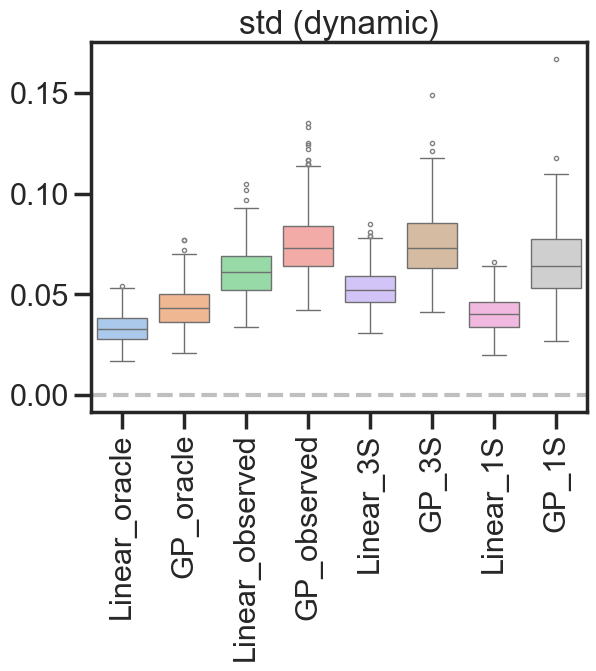

In [19]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
# plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

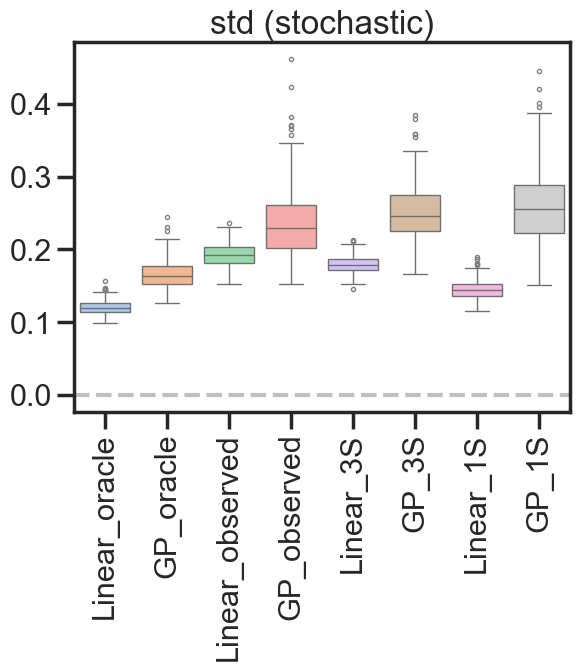

In [20]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")